### A/B Test – Recommendation System Algorithm Update
#### Executive Summary and Recommendation 

This notebook presents the final results of the A/B test in a clear, business-oriented format.

While previous notebooks focused on data preparation, exploratory analysis, and statistical testing, this phase translates the statistical outcomes into executive-level insights and decision guidance.

The objective is to:

- Summarize experimental results for all primary and secondary metrics
- Present clear visual comparisons between control and treatment groups
- Interpret statistical findings in a business context
- Provide a final recommendation regarding algorithm rollout

This section bridges statistical evidence and practical product decision-making.

#### 1. Executive Overview

This analysis evaluates the impact of an updated recommendation algorithm tested against the existing system in a 21-day randomized A/B experiment involving 24,500 users. Randomization occurred at the user level, with each user exposed to either the control (current algorithm) or treatment (updated algorithm) throughout the experiment.

The objective was to determine whether the new algorithm improves key engagement metrics — including the primary metrics (Click-Through Rate and 7-day Return Rate) and secondary consumption indicators (Completion Rate and Average Minutes Watched per Session) — in order to inform a data-driven rollout decision.

 **Results indicate:**

- A statistically significant increase in **Click-Through Rate** (15.03% → 15.97%, +0.94 percentage points)
- No statistically significant change in **7-day Return Rate**
- A statistically significant decrease in **Completion Rate** (−0.83 percentage points)
- A statistically significant increase in **Average Minutes Watched per Session** (+0.67 minutes)

Overall, the updated algorithm improves short-term engagement and time spent on the platform, but introduces a measurable decline in content completion behavior. This trade-off should be carefully evaluated before a full-scale rollout.

#### 2. Experimental Results Summary

In [1]:
# Import core libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load precomputed statistical summary from previous notebook
metrics_df = pd.read_csv("../data/processed/metrics_summary.csv")

In [2]:
exec_table = metrics_df.copy()

# Rename columns
exec_table = exec_table.rename(columns={
    "Control Mean": "Control",
    "Treatment Mean": "Treatment",
    "Significant (α=0.05)": "Statistically Significant?"
})

# Calculate Relative Lift
exec_table["Relative Lift"] = (
    (exec_table["Treatment"] - exec_table["Control"]) /
    exec_table["Control"] * 100
)

# Identify metric types
rate_metrics = [
    "Click-Through Rate (CTR)",
    "7-Day Return Rate",
    "Completion Rate"
]

is_rate = exec_table["Metric"].isin(rate_metrics)

# Format Control & Treatment
exec_table["Control"] = np.where(
    is_rate,
    (exec_table["Control"] * 100).round(2).astype(str) + "%",
    exec_table["Control"].round(2).astype(str)
)

exec_table["Treatment"] = np.where(
    is_rate,
    (exec_table["Treatment"] * 100).round(2).astype(str) + "%",
    exec_table["Treatment"].round(2).astype(str)
)

# Format Absolute Difference
exec_table["Absolute Difference"] = np.where(
    is_rate,
    (exec_table["Absolute Difference"] * 100).round(2).astype(str) + " pp",
    exec_table["Absolute Difference"].round(2).astype(str) + " min"
)

# Format CI
exec_table["95% CI"] = np.where(
    is_rate,
    (exec_table["CI Lower"] * 100).round(2).astype(str)
    + " to "
    + (exec_table["CI Upper"] * 100).round(2).astype(str)
    + " pp",
    exec_table["CI Lower"].round(2).astype(str)
    + " to "
    + exec_table["CI Upper"].round(2).astype(str)
    + " min"
)

# Format relative lift
exec_table["Relative Lift"] = (
    exec_table["Relative Lift"].round(2).astype(str) + "%"
)

# Format significance
exec_table["Statistically Significant?"] = (
    exec_table["Statistically Significant?"].map({True: "Yes", False: "No"})
)

# Final selection
exec_table = exec_table[[
    "Metric",
    "Control",
    "Treatment",
    "Absolute Difference",
    "Relative Lift",
    "95% CI",
    "Statistically Significant?"
]]

exec_table

,Metric,Control,Treatment,Absolute Difference,Relative Lift,95% CI,Statistically Significant?
0,Click-Through Rate (CTR),15.03%,15.97%,0.94 pp,6.25%,0.84 to 1.03 pp,Yes
1,7-Day Return Rate,85.57%,85.97%,0.4 pp,0.47%,-0.48 to 1.27 pp,No
2,Completion Rate,59.93%,59.1%,-0.83 pp,-1.38%,-1.19 to -0.47 pp,Yes
3,Average Watch Time (Minutes),38.89,39.56,0.67 min,1.73%,0.39 to 0.95 min,Yes


#### 3. Visual Comparison per Metrics

##### 3.1. Click-through Rate (CTR) - Effect Visualisation

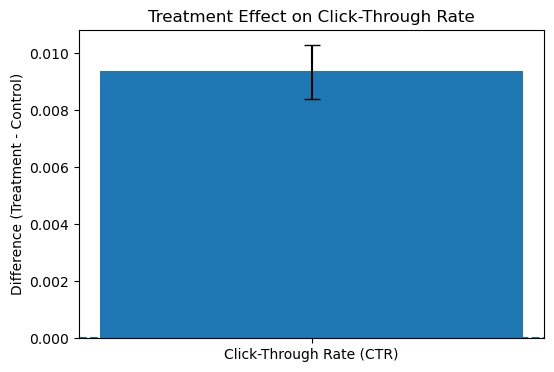

In [3]:
# Extract CTR row from summary table
ctr_row = metrics_df[metrics_df["Metric"] == "Click-Through Rate (CTR)"].iloc[0]

# Get values
mean_diff = ctr_row["Absolute Difference"]
ci_lower = ctr_row["CI Lower"]
ci_upper = ctr_row["CI Upper"]

# Calculate error bar distances
error_lower = mean_diff - ci_lower
error_upper = ci_upper - mean_diff

# Create figure
plt.figure(figsize=(6, 4))

# Plot bar with confidence interval
plt.bar(
    x=["Click-Through Rate (CTR)"],
    height=[mean_diff],
    yerr=[[error_lower], [error_upper]],
    capsize=6
)

# Add horizontal reference line at zero
plt.axhline(0, linestyle="--")

# Add title and labels
plt.title("Treatment Effect on Click-Through Rate")
plt.ylabel("Difference (Treatment - Control)")

plt.show()

##### Interpretation – Click-Through Rate (CTR)

The treatment algorithm increases Click-Through Rate by approximately **0.94 percentage points** compared to the control algorithm.

The 95% confidence interval lies entirely above zero, indicating that **the observed uplift is statistically significant** at the 5% level. The relatively narrow interval suggests a precise estimate of the treatment effect.

This result demonstrates that the updated recommendation system meaningfully improves user interaction with recommended content.


##### 3.2 7-Day Return Rate - Effect Visualisation

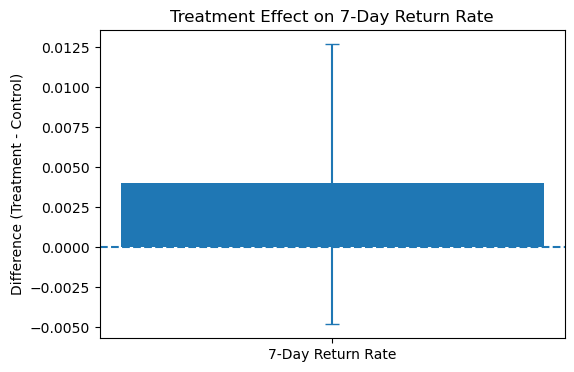

In [5]:
# Plot treatment effect for 7-Day Return Rate
plt.figure(figsize=(6,4))

# Extract values from summary table
diff = metrics_df.loc[metrics_df["Metric"] == "7-Day Return Rate", "Absolute Difference"].values[0]
ci_lower = metrics_df.loc[metrics_df["Metric"] == "7-Day Return Rate", "CI Lower"].values[0]
ci_upper = metrics_df.loc[metrics_df["Metric"] == "7-Day Return Rate", "CI Upper"].values[0]

# Plot effect size
plt.bar("7-Day Return Rate", diff)

# Add 95% confidence interval as error bar
plt.errorbar(
    x="7-Day Return Rate",
    y=diff,
    yerr=[[diff - ci_lower], [ci_upper - diff]],
    fmt="none",
    capsize=5
)

# Add zero reference line
plt.axhline(0, linestyle="--")

plt.title("Treatment Effect on 7-Day Return Rate")
plt.ylabel("Difference (Treatment - Control)")
plt.show()

##### Interpretation – 7-Day Return Rate

The treatment group shows an estimated increase of approximately **0.40 percentage points** in 7-day return rate compared to the control group.

However, the 95% confidence interval includes zero, indicating that the observed difference is **not statistically significant** at the 5% level.

This suggests that while short-term engagement metrics improved, the updated recommendation algorithm did not produce a measurable change in short-term user retention during the experiment window.


##### 3.3 Completion Rate - Effect Visualisation

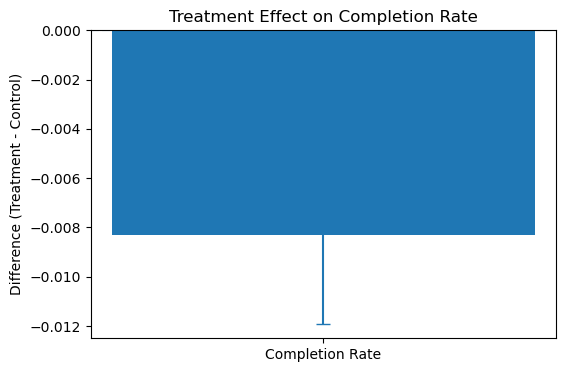

In [6]:
# Plot treatment effect for Completion Rate
plt.figure(figsize=(6,4))

# Absolute difference from summary table
diff = metrics_df.loc[metrics_df["Metric"] == "Completion Rate", "Absolute Difference"].values[0]
ci_lower = metrics_df.loc[metrics_df["Metric"] == "Completion Rate", "CI Lower"].values[0]
ci_upper = metrics_df.loc[metrics_df["Metric"] == "Completion Rate", "CI Upper"].values[0]

# Plot single bar for effect size
plt.bar("Completion Rate", diff)

# Add confidence interval as error bar
plt.errorbar(
    x="Completion Rate",
    y=diff,
    yerr=[[diff - ci_lower], [ci_upper - diff]],
    fmt="none",
    capsize=5
)

# Add zero reference line
plt.axhline(0, linestyle="--")

plt.title("Treatment Effect on Completion Rate")
plt.ylabel("Difference (Treatment - Control)")
plt.show()


##### Interpretation – Completion Rate

The treatment algorithm decreases Completion Rate by approximately **0.83 percentage points** compared to the control group.

The 95% confidence interval lies entirely below zero, indicating that the **reduction is statistically significant** at the 5% level.

Although the magnitude of the decline is modest, the result suggests that the updated recommendation system may slightly reduce the likelihood that users complete recommended content.


##### 3.4. Average Minutes Watched per Session - Effect Visualisation

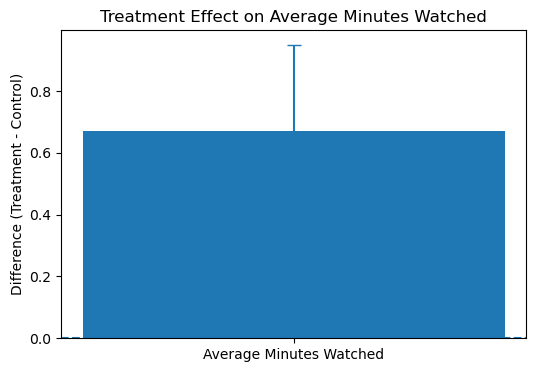

In [7]:
# Plot treatment effect for Average Minutes Watched per Session
plt.figure(figsize=(6,4))

# Extract values from summary table
diff = metrics_df.loc[metrics_df["Metric"] == "Average Watch Time (Minutes)", "Absolute Difference"].values[0]
ci_lower = metrics_df.loc[metrics_df["Metric"] == "Average Watch Time (Minutes)", "CI Lower"].values[0]
ci_upper = metrics_df.loc[metrics_df["Metric"] == "Average Watch Time (Minutes)", "CI Upper"].values[0]

# Plot effect size
plt.bar("Average Minutes Watched", diff)

# Add 95% confidence interval as error bar
plt.errorbar(
    x="Average Minutes Watched",
    y=diff,
    yerr=[[diff - ci_lower], [ci_upper - diff]],
    fmt="none",
    capsize=5
)

# Add zero reference line
plt.axhline(0, linestyle="--")

plt.title("Treatment Effect on Average Minutes Watched")
plt.ylabel("Difference (Treatment - Control)")
plt.show()

##### Interpretation – Average Minutes Watched per Session

The treatment algorithm increases average watch time by approximately **0.67 minutes per user session** compared to the control group.

The 95% confidence interval lies entirely above zero, indicating **statistical significance** at the 5% level.

While the absolute increase is moderate, the result suggests that the updated recommendation system encourages users to spend more time consuming content on the platform.

#### 5. Business Interpretation

The updated recommendation algorithm produces mixed effects across engagement metrics.

### Primary Metrics

- **Click-Through Rate (CTR):**  
  Statistically significant increase (+0.94 percentage points).  
  Users interact more frequently with recommended content under the treatment algorithm.

- **7-Day Return Rate:**  
  No statistically significant difference observed.  
  Short-term retention remains unchanged during the experiment window.

### Secondary Metrics

- **Completion Rate:**  
  Statistically significant decrease (−0.83 percentage points).  
  While users click more, they are slightly less likely to complete started content.

- **Average Minutes Watched per Session:**  
  Statistically significant increase (+0.67 minutes per user).  
  Overall time spent on the platform increases under the treatment algorithm.

---

### Interpretation

The updated recommendation algorithm drives a measurable increase in short-term engagement, as reflected by higher click-through rates and increased average watch time per user. These signals suggest that the model is more effective at capturing user attention and stimulating interaction with recommended content.

However, the statistically significant decline in completion rate indicates a potential trade-off: while users interact more frequently with recommendations, the depth of content consumption slightly decreases. This may reflect increased exploratory behavior or less precise content targeting.

Importantly, the improvement in short-term engagement does not translate into a statistically significant uplift in 7-day return rate within the observed period. This suggests that the algorithm enhances immediate interaction but does not yet demonstrate measurable impact on short-term retention.

Overall, the treatment algorithm improves engagement intensity but may alter the quality or depth of content consumption.

#### 6. Recommendation

From a performance perspective, the treatment algorithm delivers clear gains in monetizable engagement signals (CTR and time spent), which may be particularly valuable in ad-supported or engagement-driven business models.

However, the decline in completion rate and the absence of retention lift warrant careful consideration before full deployment.

Rather than immediate global rollout, a **phased rollout strategy** is recommended:

- Gradually expand exposure to additional user segments
- Monitor longer-term retention and churn metrics
- Analyze completion behavior by content category and user segments
- Evaluate downstream revenue or subscription impact

If follow-up monitoring confirms stable retention and acceptable completion behavior, the updated algorithm would present a strong candidate for full rollout.